In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data/train.csv')
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1131,1132,20,RL,63.0,10712,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,9,2007,Oth,Abnorml,93500
203,204,120,RM,NaN,4438,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,149000
323,324,20,RM,49.0,5820,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,126175
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
124,125,20,RL,48.0,17043,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,181000
428,429,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,195400
1069,1070,45,RL,60.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,135000
1421,1422,120,RL,53.0,4043,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2010,WD,Normal,127500
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
311,312,20,RL,50.0,8000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,132000


In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

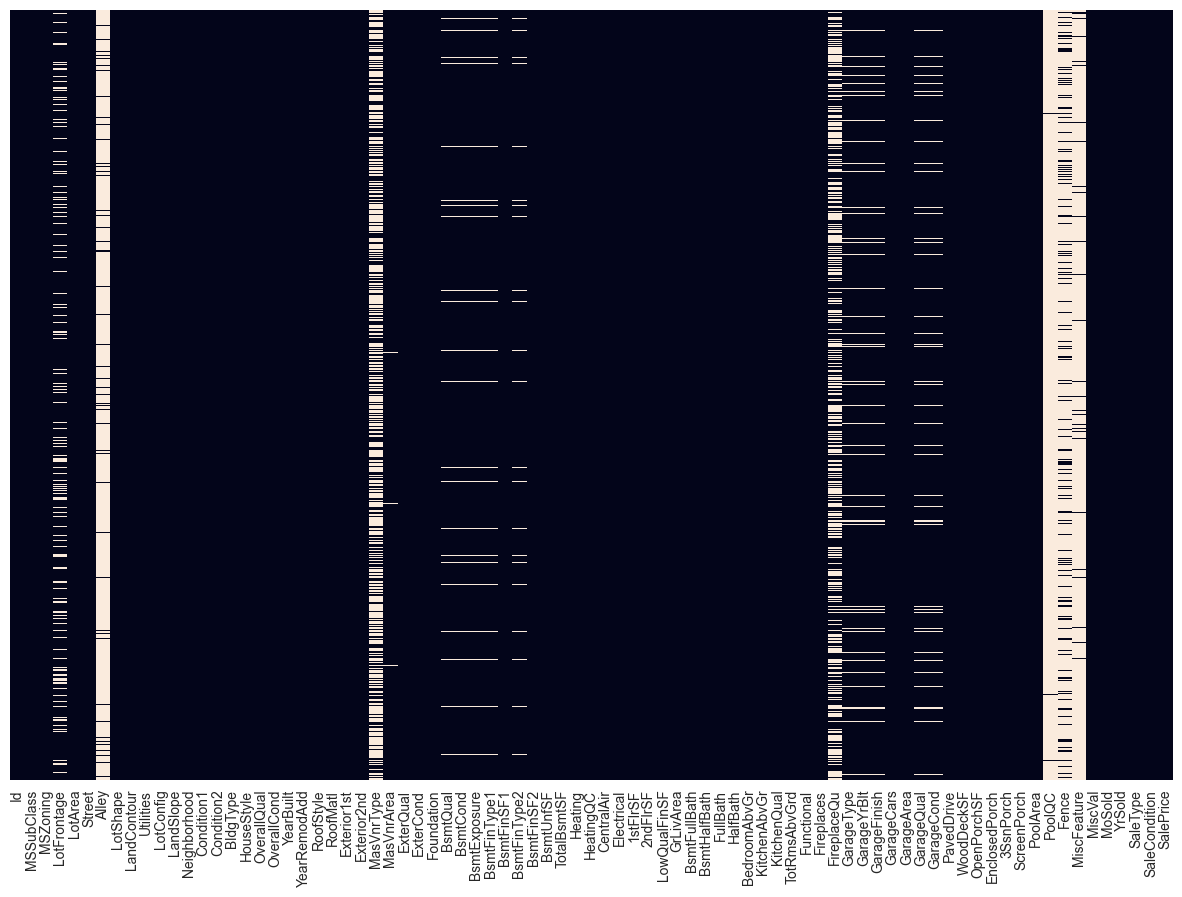

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

<Axes: ylabel='MSZoning'>

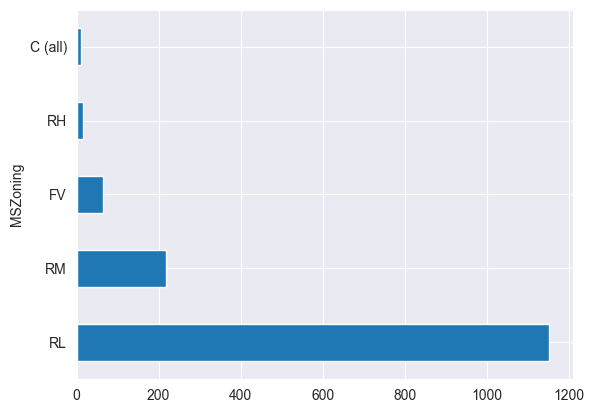

In [6]:
df['MSZoning'].value_counts().plot.barh()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Fill MissinG Value

In [8]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
df.drop(['Alley'], axis=1, inplace=True)

In [10]:
df['BsmttCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [11]:
df['FireplaceQu'] = df.FireplaceQu.fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df.GarageType.fillna(df['GarageType'].mode()[0])

In [12]:
df.drop(['GarageYrBlt'],axis=1, inplace=True)

In [13]:
df['GarageFinish'] = df.GarageFinish.fillna(df['GarageFinish'].mode()[0])

In [14]:
df['GarageQual'] = df.GarageQual.fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df.GarageCond.fillna(df['GarageCond'].mode()[0])

In [15]:
df.drop(['PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [16]:
df.shape

(1460, 77)

In [17]:
df.drop(['Id'], axis=1, inplace=True)

In [18]:
pd.get_dummies(df['MSZoning'])

,C (all),FV,RH,RL,RM
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
1455,False,False,False,True,False
1456,False,False,False,True,False
1457,False,False,False,True,False
1458,False,False,False,True,False


In [19]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

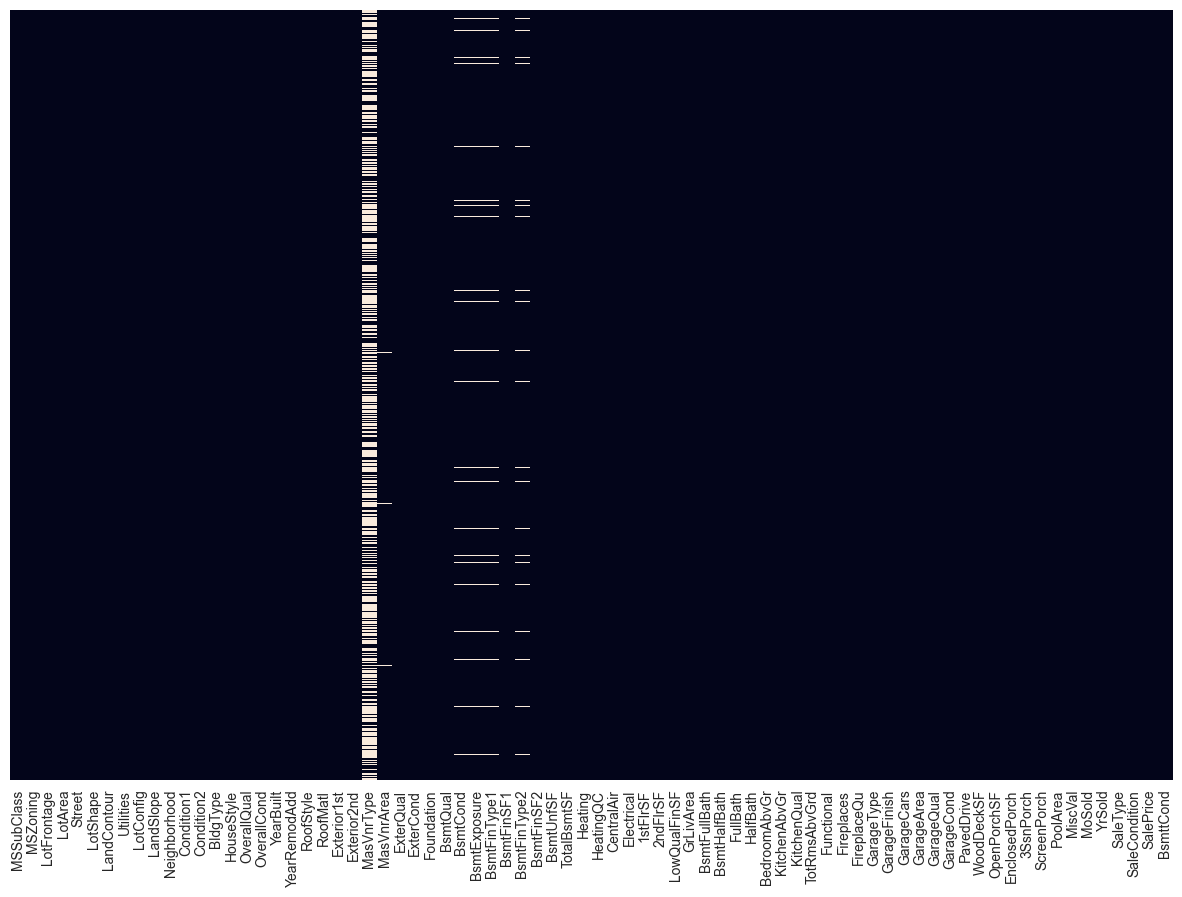

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

In [31]:
df.drop(['MasVnrType'], axis=1, inplace=True)

In [33]:
final_df = df.dropna(axis=0, inplace=True)

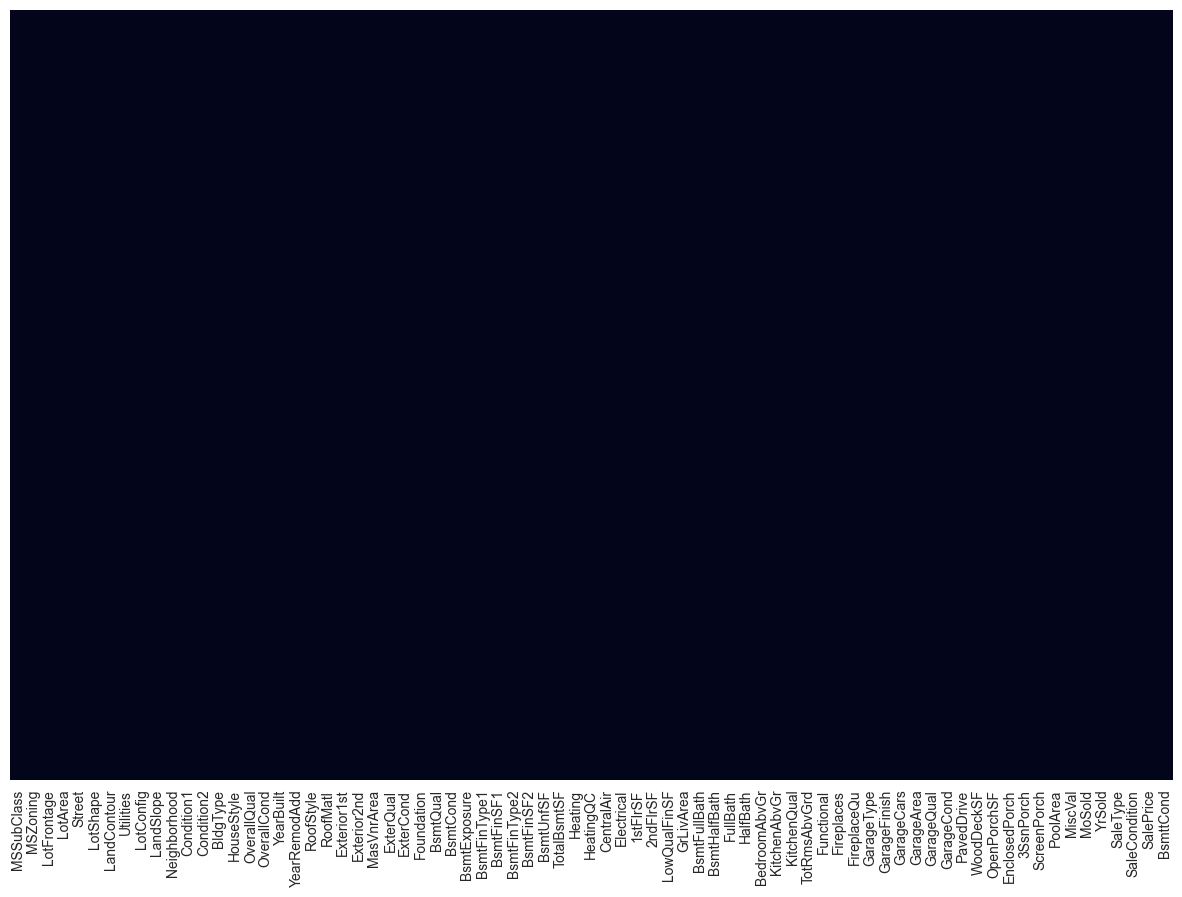

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

In [37]:
columns = df.select_dtypes(include=['object']).columns
columns


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'BsmttCond'],
      dtype='object')

In [39]:
len(columns)

39

In [51]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:

        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)

        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:

            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1


    df_final=pd.concat([final_df,df_final],axis=1)

    return df_final

In [41]:
main_df = df.copy()

In [42]:
test_df = pd.read_csv('formulatedtest.csv')

In [43]:
test_df.shape

(1459, 74)

In [44]:
final_df=pd.concat([df,test_df],axis=0)

In [45]:
final_df.shape

(2871, 76)

In [47]:
final_df.drop(['FireplaceQu'], axis=1, inplace=True)

In [49]:
final_df.head(10
            )

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmttCond,MasVnrType
0,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500.0,TA,NaN
1,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500.0,TA,NaN
2,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500.0,TA,NaN
3,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000.0,Gd,NaN
4,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000.0,TA,NaN
5,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,700,10,2009,WD,Normal,143000.0,TA,NaN
6,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,8,2007,WD,Normal,307000.0,TA,NaN
7,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,350,11,2009,WD,Normal,200000.0,TA,NaN
8,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,4,2008,WD,Abnorml,129900.0,TA,NaN
9,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,1,2008,WD,Normal,118000.0,TA,NaN


In [52]:
final_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu


KeyError: 'FireplaceQu'